# Import modules

In [19]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline

Batch Process mVR Batch 3: (animals 153,154,156)

In [20]:
mainpath = '/Volumes/freeman/Nick/mVR/sessions/Batch3/'

In [21]:
summaries = glob(mainpath + 'animalsummary*.csv')

print summaries.sort()
print len(summaries)

None
3


# Get animal stats (batch)

In [22]:
animal_stats = [pd.Series.from_csv(x) for x in summaries]
print animal_stats

[Animal                1.530000e+02
correctAntibias       5.407407e-01
correctBefore         1.698113e-01
correctWater          9.465589e-01
incomplete            2.800000e+01
meanAntibiasIdPhi     9.304365e+00
meanAntibiaszIdphi    7.723291e-17
meanChoiceTime        7.591978e+00
meanIdPhi             1.136672e+01
meanNumTrials         3.857143e+01
meanTime              3.724528e+01
meanWaterIdPhi        1.119753e+01
meanWaterzIdPhi       1.018294e-16
meanzIdPhi           -4.914821e-17
medianIdPhi           3.641050e+00
medianzIdPhi         -4.178946e-01
numDays               7.000000e+00
stdAntibiasIdPhi      1.803008e+01
stdAntibiaszIdPhi     1.000000e+00
stdIdPhi              1.848713e+01
stdWaterIdPhi         1.613183e+01
stdWaterzIdphi        1.000000e+00
stdzIdPhi             1.000000e+00
totalDeadEnd          1.400000e+01
dtype: float64, Animal                1.540000e+02
correctAntibias       4.874074e-01
correctBefore         3.888889e-01
correctWater          4.016981e-01
inc

In [23]:
UB_before = [x.correctBefore for x in animal_stats]
AB = [x.correctAntibias for x in animal_stats]
Water = [x.correctWater for x in animal_stats]

means = np.array([UB_before, AB, Water])

meansT = np.transpose(means)


In [24]:
mean_before = np.mean(UB_before)
mean_antibias = np.mean(AB)
mean_after = np.mean(Water)

perc_corr =  [mean_before, mean_antibias, mean_after]


# Create batch bar plot (performance)

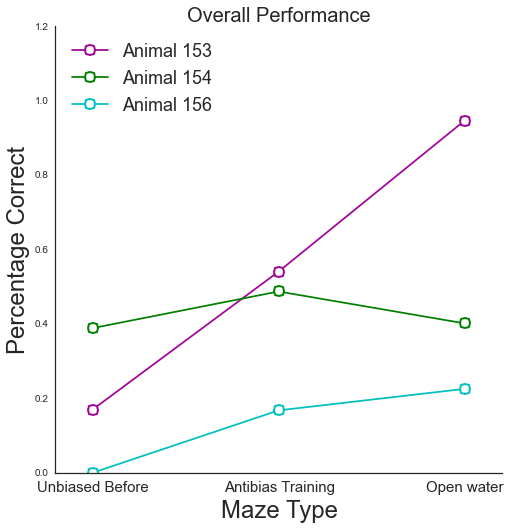

In [25]:
plt.figure(figsize = [8,8])
clrs = ['#a00498', 'g', 'c', '#2000b1']
ypos = np.arange(len(perc_corr))
[plt.plot(ypos,meansT[i],
          marker='o', 
          mfc = 'w',
          markeredgecolor= clrs[i],
          markeredgewidth=2.0,
          markersize = 10.0, 
          color = clrs[i]) for i in range(len(meansT))]


plt.xlabel('Maze Type', fontsize = 24.0)
plt.ylabel('Percentage Correct', fontsize = 24.0)
plt.title('Overall Performance', fontsize = 20.0)
labels = ['Unbiased Before', 'Antibias Training', 'Open water']
plt.xticks(ypos,labels, fontsize = 15.0)
plt.ylim(0,1.2)
plt.xlim(-0.2,2.2)
sns.despine()
plt.legend(['Animal 153', 'Animal 154', 'Animal 156'], loc ='best', fontsize = 18.0)
plt.savefig('batch3plot.eps', format='eps')


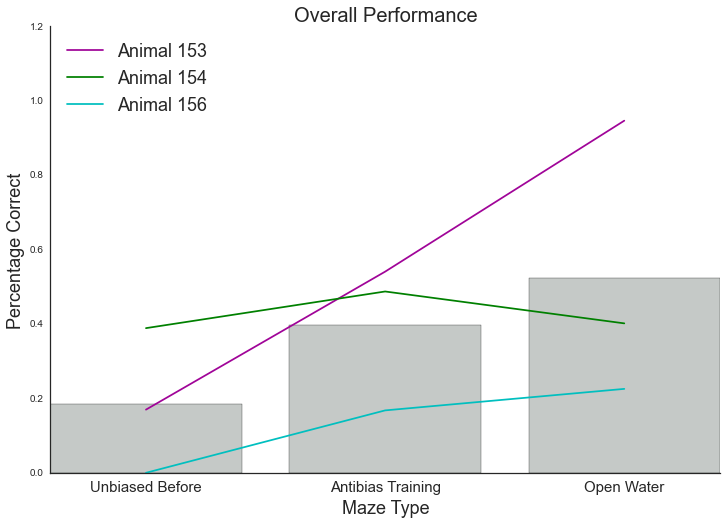

In [28]:
plt.figure(figsize = [12,8])
plt.bar(range(0,len(perc_corr)),perc_corr,align = 'center', color = '#c5c9c7')

labels = ['Unbiased Before', 'Antibias Training', 'Open Water']
ypos = np.arange(len(perc_corr))
plt.xticks(ypos,labels, fontsize = 15.0)
plt.xlabel('Maze Type', fontsize = 18.0)
plt.ylabel('Percentage Correct', fontsize = 18.0)
plt.title('Overall Performance', fontsize = 20.0)
plt.ylim(0,1.2)

plt.plot(ypos, meansT[0], '-', color = '#a00498')
plt.plot(ypos, meansT[1], '-',color='g')
plt.plot(ypos,meansT[2],'-',color='c')
sns.despine()
plt.legend(['Animal 153', 'Animal 154', 'Animal 156'], loc ='best', fontsize = 18.0)


# Compile Rolling averages

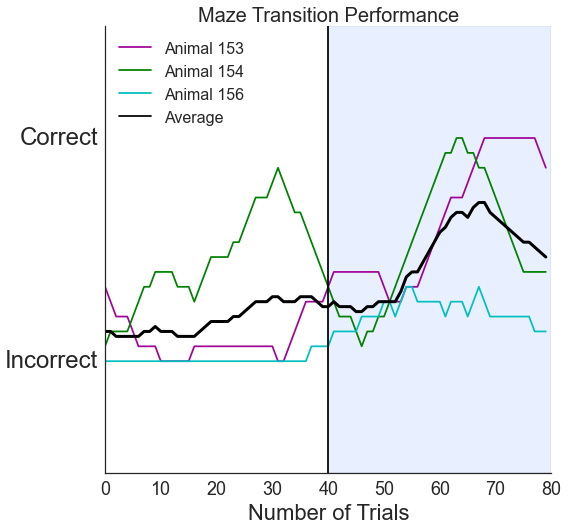

In [30]:
plt.figure(figsize = [8,8])

averages = glob(mainpath+'/rollingavg*.csv')
averages.sort()
averages = [pd.Series.from_csv(x) for x in averages]


plt.plot(averages[0],color = '#a00498')
plt.ylim(-0.5,1.5)
plt.xlim(0,80)
plt.plot(averages[1], color='g')
plt.plot(averages[2], color='c')
plt.xlabel('Number of Trials',fontsize = 22)
plt.xticks(fontsize=18)
plt.yticks([0,1], ['Incorrect','Correct'],fontsize = 24)
plt.title('Maze Transition Performance', fontsize = 20)
plt.axvline(x=40,c = 'k')
plt.axvspan(40,80, facecolor = [0.7,0.8,1.0], alpha = 0.3)

avgT = np.transpose(averages)

totalavg = [np.mean(i) for i in avgT]

plt.plot(totalavg, linewidth = 3.0, color = 'k')
sns.despine()

plt.legend(['Animal 153', 'Animal 154','Animal 156', 'Average'], loc = 'best', fontsize = 16.0)
plt.savefig('batch3trans.eps', format='eps')